In [202]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2018_down1/2018_down1_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2018_down1/2018_down1_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2018_down1/2018_down1_(KR)BlockMedia.csv', error_bad_lines=False))


In [203]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [204]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
text['main article']

0     \n\n\n\n\n\n\n                        "설명해주지 않...
1     \n\t\t\t\t\t\t\t\t"환전·지급 등 경제활동 이뤄져 법정화폐 인정과는 ...
2     \n비트코인 탄생시킨 블록체인, 산업과 금융의 미래를 바꾼다한경닷컴 블록체인 세미나...
3     \n\t\t\t\t\t\t\t\t국내외 가상화폐 가격이 큰 폭으로 하락하는 가운데 ...
4     \n\n\n\n\n\n\n                        “회사 선배가 ...
5     \n\n\n\n\n'그것이 알고싶다' 비트코인 거래소 추적 \n\n         ...
6     \n가상화폐 불법 거래로 원화 환전 수수료에 차익도 챙겨\n\n\n\n\n\n\n ...
7     \n\n\n\n\n\n그것이 알고싶다(사진=방송 캡쳐)\n\nSBS '그것이 알고싶...
8     \n\n\n\n\n\n'JTBC 뉴스룸'김진화 (사진=방송 영상 캡처)\n\n김진화...
0     지난 2014년, 50센트는 'Animal Ambition(애니멀 앰비션)'이라는 ...
1     6일(현지시간) CNBC에 따르면 뉴욕증권거래소는 연초에 비트코인 선물과 연동한 5...
2     17일 업비트에 따르면 이날 오전 7시 30분 비트코인 가격은 전날보다 39.45%...
3     반면 시가총액 1위인 비트코인은 등급이 C+로 비교적 저조한 성적을 받았다. 리플은...
4     26일 국민의당 이찬열 의원이 국민연금공단으로부터 제출받은 자료에 따르면, 국민연금...
5     11일(현지시간) CNBC에 따르면 리플은 머니그램과 제휴를 맺고 리플 암호화폐로 ...
6     한국블록체인협회 준비위원회(이하 준비위원회)는 한국사회여론연구소에 ‘블록체인 소셜 ...
7     지난 12일 신규 암호화폐 거래소 고팍스는 이날 오후 이니그마와 시빅에 대한 상장 ...
8     9일 앱 분석업체 와이즈앱은 지난 12월 한국 안드로이드 스마트폰 사용자 2

In [206]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [207]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
text['pos tag']

0     [(", SY), (설명, NNG), (해, XSV+EC), (주, VX), (지,...
1     [(", SY), (환전, NNG), (·, SC), (지급, NNG), (등, N...
2     [(비트코인, NNP), (탄생, NNG), (시킨, XSV+ETM), (블록체인,...
3     [(국내외, NNG), (가, JKS), (상, NNG), (화폐, NNG), (가...
4     [(“, SSO), (회사, NNG), (선배, NNG), (가, JKS), (단,...
5     [(', SY), (그것, NP), (이, JKS), (알, VV), (고, EC)...
6     [(가상, NNG), (화폐, NNG), (불법, NNG), (거래, NNG), (...
7     [(그것, NP), (이, JKS), (알, VV), (고, EC), (싶, VX)...
8     [(', SY), (JTBC, SL), (뉴스룸, NNP), (', SY), (김진...
0     [(지난, VV+ETM), (2014, SN), (년, NNBC), (,, SC),...
1     [(6, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간,...
2     [(17, SN), (일, NNBC), (업, NNG), (비트, NNG), (에,...
3     [(반면, NNG), (시가총액, NNP), (1, SN), (위, NNBC), (...
4     [(26, SN), (일, NNBC), (국민, NNG), (의, JKG), (당,...
5     [(11, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
6     [(한국, NNP), (블록체인, NNG), (협회, NNG), (준비, NNG),...
7     [(지난, VV+ETM), (12, SN), (일, NNBC), (신규, NNG),...
8     [(9, SN), (일, NNBC), (앱, NNG), (분석, NNG), 

In [209]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [210]:
text['main article']

0     [", 설명, 해, 주, 않, 모른다는, 말, 설명, 해줘도, 모른다는, 말, 이,...
1     [", 환전, ·, 지급, 등, 경제, 활동, 이뤄져, 법정, 화폐, 인, 정과, ...
2     [비트코인, 탄생, 시킨, 블록체인, ,, 산업, 과, 금융, 의, 미래, 바꾼다,...
3     [국내외, 상, 화폐, 가격, 큰, 폭, 하락, 하, 는, 가운데, 비트코인, 과,...
4     [“, 회사, 선배, 단, 하루, 만, 가상, 화폐, 투자, 만, 원, 벌, 다는,...
5     [', 그것, 알, 싶, ', 비트코인, 거래소, 추적, SBS, ', 그것, 알,...
6     [가상, 화폐, 불법, 거래, 원화, 환전, 수수료, 차익, 챙겨, 가상, 화폐, ...
7     [그것, 알, 싶, (, 사진, =, 방송, 캡쳐, ), SBS, ', 그것, 알,...
8     [', JTBC, 뉴스룸, ', 김진화, (, 사진, =, 방송, 영상, 캡처, )...
0     [지난, 년, ,, 센트, ', Animal, Ambition, (, 애니멀, 앰,...
1     [일, (, 현지, 시간, ), CNBC, 따르, 뉴욕, 증권거래소, 연초, 비트코...
2     [일, 업, 비트, 따르, 이날, 오전, 시, 분, 비트코인, 가격, 전날, ., ...
3     [반면, 시가총액, 위, 인, 비트코인, 등급, C, +, 비교, 적, 저조, 한,...
4     [일, 국민, 의, 당, 이찬열, 의원, 국민, 연금, 공단, 제출, 받, 은, 자...
5     [일, (, 현지, 시간, ), CNBC, 따르, 리플, 머니, 그램, 과, 제휴,...
6     [한국, 블록체인, 협회, 준비, 위원회, (, 이하, 준비, 위원회, ), 한국,...
7     [지난, 일, 신규, 암호, 화폐, 거래소, 고, 팍스, 이날, 오후, 이니그마, ...
8     [일, 앱, 분석, 업체, 와, 이즈, 앱, 지난, 월, 한국, 안드로이드,

In [211]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [212]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0     [설명, 모른다는, 설명, 해줘도, 모른다는, 무라카미, 하루키, 소설, 글귀, 블...
1     [환전, 지급, 경제, 활동, 이뤄져, 법정, 화폐, 정과, 무관, 법원, 불법, ...
2     [비트코인, 탄생, 시킨, 블록체인, 산업, 금융, 미래, 바꾼다, 한경, 닷컴, ...
3     [국내외, 화폐, 가격, 하락, 가운데, 비트코인, 국내, 가격, 외국, 김치, 프...
4     [회사, 선배, 하루, 가상, 화폐, 투자, 다는, 소식, 습니다, 달치, 노동, ...
5     [비트코인, 거래소, 추적, SBS, 가상, 화폐, 비트코인, 열풍, 명암, 방송,...
6     [가상, 화폐, 불법, 거래, 원화, 환전, 수수료, 차익, 챙겨, 가상, 화폐, ...
7     [사진, 방송, 캡쳐, SBS, 방영, 가상, 화폐, 논란, 쩐의, 전쟁, 비트코인...
8     [JTBC, 뉴스룸, 김진화, 사진, 방송, 영상, 캡처, 김진화, 한국, 블록체인...
0     [센트, Animal, Ambition, 애니멀, 정규, 앨범, 발표, 비트코인, ...
1     [현지, 시간, CNBC, 뉴욕, 증권거래소, 연초, 비트코인, 선물, 연동, ET...
2     [비트, 이날, 오전, 비트코인, 가격, 전날, 하락, 떨어져, 투자자, 경악, 전...
3     [반면, 시가총액, 비트코인, 등급, 비교, 저조, 성적, 리플, 비트코인, 캐시,...
4     [국민, 이찬열, 의원, 국민, 연금, 공단, 제출, 자료, 국민, 연금, 관리, ...
5     [현지, 시간, CNBC, 리플, 머니, 그램, 제휴, 리플, 암호, 화폐, 자금,...
6     [한국, 블록체인, 협회, 준비, 위원회, 이하, 준비, 위원회, 한국, 사회, 여...
7     [신규, 암호, 화폐, 거래소, 팍스, 이날, 오후, 이니그마, 시빅, 상장, 공지...
8     [분석, 업체, 이즈, 한국, 안드로이드, 스마트폰, 사용자, 대상, 암호,

In [213]:
article_contents = tokenized_doc.values.tolist()

In [214]:
len(tokenized_doc)

48

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [216]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [217]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [218]:
# article_contents_tfidf

In [219]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [220]:
word2id = defaultdict(lambda: 0)

In [221]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [222]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [223]:
len(tf_idf_result)

2374

In [224]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

2374


In [225]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [226]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.003*"플랫폼" + 0.003*"SK" + 0.003*"차량" + 0.003*"맞춤" + 0.003*"AR" + 0.003*"하반기" + 0.003*"정립" + 0.003*"절감"')
(1, '0.003*"오픈" + 0.003*"앤디" + 0.003*"영리" + 0.003*"불립니다" + 0.003*"투명" + 0.003*"KlickEx" + 0.003*"피터" + 0.003*"규제책"')
(2, '0.003*"진다" + 0.003*"XLM" + 0.003*"소비자" + 0.003*"Ripple" + 0.003*"마운트" + 0.003*"Foundation" + 0.003*"분권" + 0.003*"추락"')
(3, '0.003*"내년" + 0.003*"엇갈리" + 0.003*"역량" + 0.003*"Lumens" + 0.003*"지분" + 0.003*"오류" + 0.003*"구축" + 0.003*"주목"')


In [227]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [228]:
sentences = article_contents

In [229]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

7507

In [230]:
from gensim.models import Word2Vec

In [231]:
model = Word2Vec(sentences, min_count=1)

In [232]:
len(model.wv.vocab)

2374

In [233]:
# model.wv.vocab

In [234]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [235]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [236]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [237]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [238]:
temp_cluster_result['cluster'] = assigned_clusters

In [239]:
temp_cluster_result['raw_data'] = X.tolist()

In [240]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [241]:
from sklearn.metrics import pairwise_distances

In [242]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [243]:
len(cosine_centroid_list)

2374

In [244]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [245]:
sum(temp_distance[3])

2218.2186892537557

In [246]:
import scipy.spatial.distance as dist

In [247]:
dist.cosine(X[0],cosine_centroid_list[0])

0.45986909040835566

In [248]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.03127544437804949

In [249]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [250]:
len(tf_idf_value)

2374

In [251]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [252]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소 , 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
77,"[-0.0031754395458847284, -0.01603282243013382,...",화폐,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.181314,0.558405,0.622909,NaN
76,"[-0.00454203924164176, -0.007869870401918888, ...",암호,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.154571,0.397892,0.756679,NaN
17,"[-0.00427244883030653, -0.012443413026630878, ...",비트코인,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.198741,0.314244,0.884497,NaN
88,"[0.002888574032112956, -0.006591045763343573, ...",거래,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.237557,0.180860,1.056697,NaN
7,"[0.00017403613310307264, -0.012473076581954956...",블록체인,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.239455,0.174078,1.065377,NaN
79,"[-0.0030663362704217434, -0.007444573566317558...",가상,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.294788,0.171817,1.122971,NaN
125,"[0.004356991499662399, -0.008170454762876034, ...",기술,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.233079,0.090430,1.142650,NaN
184,"[-0.00037226424319669604, -0.00797177758067846...",시장,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.225441,0.074605,1.150836,NaN
188,"[0.003098057582974434, -0.008326008915901184, ...",거래소,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.321876,0.158252,1.163623,NaN
437,"[-0.0018332781037315726, -0.007468147668987513...",가격,0,"[-0.0003756991, -0.0018136697, 0.00010030311, ...",0.266702,0.088169,1.178533,NaN


In [253]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1994,"[-0.0012362436391413212, 0.0013316909316927195...",채팅,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.592505,0.002261,1.590244,NaN
1893,"[-0.00283496524207294, 0.002565382979810238, -...",알려진,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.631985,0.004521,1.627464,NaN
1649,"[-0.00305686192587018, 0.0034668229054659605, ...",즉시,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.643906,0.002261,1.641645,NaN
778,"[0.00011835238547064364, 0.0025286111049354076...",이야기,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.651010,0.009043,1.641967,NaN
929,"[-0.0035573008935898542, -0.001102473470382392...",경찰서,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.651251,0.002261,1.648990,NaN
779,"[0.0037521892227232456, -0.001016915775835514,...",학자금,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.652002,0.002261,1.649742,NaN
642,"[-0.0020465347915887833, 0.004145827144384384,...",신풍,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.667917,0.002261,1.665657,NaN
1656,"[-0.002112277317792177, -0.0009345416910946369...",씨티,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.680888,0.002261,1.678627,NaN
1687,"[-0.0010292858351022005, -0.004259597510099411...",이끌,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.690513,0.006782,1.683731,NaN
1547,"[0.0027388546150177717, -0.005588555242866278,...",악성,1,"[0.00016160606, 0.00028824346, 0.00040739327, ...",0.702214,0.013564,1.688650,NaN


In [257]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
572,"[0.00040608178824186325, -0.003370227990671992...",소장,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.581654,0.002261,1.579393,NaN
39,"[0.004580713342875242, -0.005845420062541962, ...",이메일,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.616619,0.022607,1.594011,NaN
950,"[0.000850136682856828, -0.005075700581073761, ...",서버,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.627568,0.009043,1.618525,NaN
292,"[-0.0037635616026818752, 0.001798245357349515,...",닷컴,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.644175,0.018086,1.626089,NaN
743,"[-0.004225836601108313, 0.0016287185717374086,...",자신,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.648424,0.018086,1.630338,NaN
1050,"[-0.004155450500547886, -0.0032163732685148716...",지수,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.656907,0.009043,1.647864,NaN
132,"[-0.0010488014668226242, -0.002003730274736881...",신용,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.670492,0.020347,1.650145,NaN
664,"[-0.0012652401346713305, 0.004535929299890995,...",청춘,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.662628,0.002261,1.660368,NaN
667,"[-5.981535650789738e-05, 0.003554334631189704,...",사원,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.667994,0.002261,1.665733,NaN
2251,"[-0.003962894901633263, 0.003410658100619912, ...",미디어,2,"[-0.0003286109, -0.00017407663, 0.00045979157,...",0.671160,0.002261,1.668899,NaN


In [256]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2307,"[0.0014975605299696326, 0.003403574926778674, ...",새삼,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.585245,0.002261,1.582984,NaN
1412,"[0.004520798567682505, -0.0029884979594498873,...",굴기,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.648386,0.011304,1.637082,NaN
920,"[0.004503963515162468, -0.004856239538639784, ...",보이스,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.669645,0.002261,1.667384,NaN
1409,"[-0.0022071118000894785, -0.002189751015976071...",재정,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.676261,0.002261,1.674000,NaN
1605,"[0.0010682676220312715, -0.004912361036986113,...",개미,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.681475,0.004521,1.676953,NaN
696,"[0.003812552662566304, 0.0037723290733993053, ...",심지어,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.679454,0.002261,1.677193,NaN
1819,"[0.0006178055191412568, -0.0021908977068960667...",수락,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.689492,0.002261,1.687231,NaN
1722,"[0.0021752058528363705, -0.0006628939881920815...",뒷받침,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.694049,0.002261,1.691789,NaN
1267,"[0.004314389079809189, 0.0031831429805606604, ...",이어질,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.700645,0.002261,1.698384,NaN
419,"[0.004401594400405884, -0.0015246064867824316,...",세미나,3,"[0.00050018495, -0.00036394811, -0.0006660625,...",0.721155,0.015825,1.705330,NaN


In [199]:
y_km = temp_cluster_result['cluster'].values

In [200]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

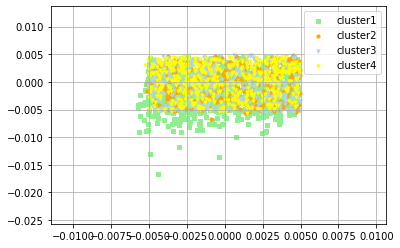

In [201]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [297]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소, 돈

897

In [298]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 사회이슈

499

In [299]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기술한계

501

In [300]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

477

In [258]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [259]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [260]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소, 돈

In [261]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 #  사회이슈

In [262]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 4 #  기술한계

In [263]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [264]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [265]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [266]:
kmeans.inertia_

1.9625987029103464

In [267]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 0 0 ... 0 0 2]


In [268]:
cluster_values= list(model.wv.vocab)

In [269]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.9625987


In [270]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [271]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.009903253


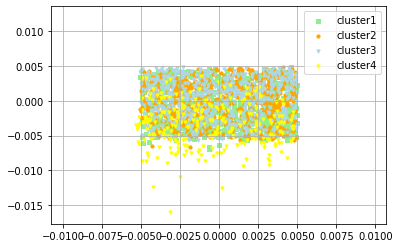

In [272]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [273]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [274]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [275]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [276]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [277]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [278]:
import scipy.spatial.distance as dist

In [279]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [280]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [281]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 부정 단어

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
70,"[-0.003366759978234768, 0.0015049328794702888,...",디지털,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.030009,0.027129,1.002880,NaN
49,"[0.0006517288857139647, -0.0017956796800717711...",전문가,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.027988,0.022607,1.005381,NaN
628,"[0.0033159591257572174, -0.004770022816956043,...",회사,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.027093,0.020347,1.006746,NaN
507,"[0.0013449005782604218, 9.483127359999344e-05,...",부정,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.027348,0.020347,1.007002,NaN
1512,"[0.001986660761758685, -0.0028803807217627764,...",계획,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.027646,0.020347,1.007299,NaN
610,"[0.0018281469820067286, 0.0014908610610291362,...",강화,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.030250,0.022607,1.007643,NaN
262,"[-0.0006636857870034873, -0.006876274477690458...",기관,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.030629,0.022607,1.008021,NaN
435,"[0.0016052423743531108, -0.0045865080319345, 0...",손실,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.028443,0.018086,1.010357,NaN
143,"[0.0015664581442251801, 0.0016026539960876107,...",인터넷,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.028518,0.018086,1.010432,NaN
380,"[0.0031867828220129013, -0.0038298622239381075...",사례,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.031691,0.020347,1.011344,NaN


In [282]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
212,"[0.004561539739370346, 0.0021728624124079943, ...",일본,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.027268,0.027129,1.000139,NaN
923,"[0.0020934916101396084, 0.002150957705453038, ...",현지,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.030407,0.022607,1.007799,NaN
132,"[-0.0010488014668226242, -0.002003730274736881...",신용,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.028746,0.020347,1.008399,NaN
1238,"[0.0026279217563569546, 0.0020166155882179737,...",국민,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.028792,0.020347,1.008446,NaN
1065,"[-0.004289642907679081, -0.0064355977810919285...",최대,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.029163,0.020347,1.008816,NaN
1607,"[-0.002887690905481577, -0.00425046868622303, ...",국가,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.026960,0.018086,1.008874,NaN
819,"[0.0019542572554200888, -0.0010230079060420394...",사기,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.025472,0.015825,1.009647,NaN
587,"[0.0014246684731915593, 0.00021143998310435563...",지난달,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.026523,0.015825,1.010697,NaN
243,"[-0.001907728728838265, -0.00657819164916873, ...",적용,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.026968,0.015825,1.011142,NaN
98,"[0.0011768888216465712, 0.0019099676283076406,...",이유,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.029944,0.018086,1.011858,NaN


In [283]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
84,"[0.00158326153177768, -0.003105491865426302, -...",법정,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.027320,0.020347,1.006973,NaN
129,"[-0.0004570150631479919, -0.003272369503974914...",방식,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.027818,0.020347,1.007471,NaN
1132,"[6.749587919330224e-05, 0.001606166479177773, ...",금지,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.028510,0.020347,1.008164,NaN
332,"[0.004235222004354, -0.0016647506272420287, -0...",기소,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.027393,0.018086,1.009307,NaN
393,"[-0.00046318117529153824, -0.00360662583261728...",보유,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.027715,0.018086,1.009629,NaN
90,"[-0.0016057748580351472, -0.00511429226025939,...",기반,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.025937,0.015825,1.010112,NaN
1081,"[0.0004920139908790588, 0.0031396127305924892,...",전날,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.028280,0.015825,1.012455,NaN
758,"[0.0009972676634788513, 0.001044410397298634, ...",추적,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.026020,0.013564,1.012455,NaN
916,"[0.0033245182130485773, 0.00011554000957403332...",결과,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.026528,0.013564,1.012963,NaN
899,"[-0.0016445349901914597, -0.001433736528269946...",각각,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.030103,0.015825,1.014277,NaN


In [284]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
77,"[-0.0031754395458847284, -0.01603282243013382,...",화폐,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.048526,0.558405,0.490121,NaN
76,"[-0.00454203924164176, -0.007869870401918888, ...",암호,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.043307,0.397892,0.645415,NaN
17,"[-0.00427244883030653, -0.012443413026630878, ...",비트코인,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.038262,0.314244,0.724018,NaN
88,"[0.002888574032112956, -0.006591045763343573, ...",거래,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.035089,0.180860,0.854229,NaN
79,"[-0.0030663362704217434, -0.007444573566317558...",가상,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.035228,0.171817,0.863411,NaN
7,"[0.00017403613310307264, -0.012473076581954956...",블록체인,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.037896,0.174078,0.863819,NaN
188,"[0.003098057582974434, -0.008326008915901184, ...",거래소,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.030213,0.158252,0.871960,NaN
193,"[-0.002313577802851796, -0.0008061026455834508...",투자,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.031921,0.133384,0.898537,NaN
170,"[-4.971739690518007e-05, -0.004619259852916002...",코인,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.032121,0.106255,0.925865,NaN
340,"[0.0014893778134137392, -0.009402120485901833,...",규제,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.032602,0.099473,0.933129,NaN


In [285]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #부정

722

In [286]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #부정

726

In [287]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #제도한계

668

In [288]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #사회이슈

258

In [91]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [289]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 2 # 부정 

In [290]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 2 # 부정

In [291]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 10 # 제도한계 

In [292]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 5 : 사회이슈  

In [293]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,label
0,"[0.0023865948896855116, -0.0035517956130206585...",설명,3,"[-0.00073802995, -0.0035552024, 0.00026223005,...",0.029515,0.042954,0.986560,NaN,5.0
1,"[0.00020481616957113147, -0.003233712865039706...",모른다는,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.026465,0.004521,1.021943,NaN,2.0
2,"[-0.0030765249393880367, -0.003617815440520644...",해줘도,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.028346,0.002261,1.026085,NaN,2.0
3,"[-0.004106733947992325, 0.0026732219848781824,...",무라카미,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.027864,0.002261,1.025603,NaN,2.0
4,"[-0.00363746820949018, -0.0011449047597125173,...",하루키,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.029503,0.002261,1.027242,NaN,10.0
...,...,...,...,...,...,...,...,...,...
2369,"[-0.001659161178395152, -0.0010849649552255869...",시대,1,"[5.8643687e-05, -0.00018803641, 0.0004206812, ...",0.027735,0.004521,1.023213,NaN,2.0
2370,"[0.00150128488894552, -0.0016929296543821692, ...",질서,2,"[-0.00020889039, 0.00010522257, -0.0004187839,...",0.028652,0.004521,1.024131,NaN,10.0
2371,"[0.0010996251367032528, -0.004033482167869806,...",보여준다,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.029553,0.002261,1.027292,NaN,2.0
2372,"[0.0036347019486129284, -0.003580155549570918,...",죽일,0,"[0.00014538577, -0.0010531538, 0.00015593169, ...",0.028031,0.002261,1.025770,NaN,2.0


In [115]:
temp_cluster_result1['Silhouette'] = 0.009903253
temp_cluster_result['Silhouette'] = 0.009903253

In [294]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [ ]:
len(temp_cluster_result1)

In [ ]:
len(temp_cluster_result)

In [ ]:
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [ ]:
temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

2374

In [296]:
len(temp_cluster_result)

2374

In [301]:
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [302]:
temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")